# Proyecto Data Science I: Parte I

## Contenido:
[ABSTRACT](#abstract)
1. [Introducción](#introduccion)
    <br> 1.1. [Hipotesis Iniciales](#hipotesis)
2. [Descripcion del Dataset](#descripcion-dataset)
3. [Preparación inicial](#preparacion-inicial)
4. [Descripción de los datos](#descripcion-datos)
    <br> 4.1. [Información de los datos](#info-datos)
    <br> 4.2. [Describe - Variables Numéricas](#describe-numericas)
    <br> 4.3. [Describe - Variables No Numéricas](#describe-no-numericas)
5. [Análisis de datos](#analisis-datos)
    <br> 5.1. [Evolución temporal de los juegos](#evolucion-temporal)   

## *ABSTRACT* <a class="anchor" id="abstract"></a>

AQUI VA EL ASTRACT

## 1. Introducción <a class="anchor" id="introduccion"></a>

El presente documento se analizará una fuente de datos que contiene información sobre los juegos olimpicos modernos. En ella existe información sobre los deportistas participantes, los deportes, los comités participantes, el país anfitrión de los respectivos juegos y los resultados en términos de medallas.

El objetivo de este trabajo será establecer el comportamiento de ciertas variables de interés como son:

* ¿Como ha evolucionado el número de participantes a lo largo del tiempo?
* ¿Como ha evolucionado el peso y estatura de los participantes?
* ¿Como ha evolucionado el numero de eventos/deportes?
* ¿Como ha evolucionado el numero de paises participantes?
* Establecer la distribución del medallero olímpico y evaluar cuales son los países mas exitosos en terminos del numero de medallas obtenidas
* Estudiar las variables anteriores separadas por género y análizar la participación femenina en los juegos olímpicos

### 1.1. Hipótesis Iniciales <a class="anchor" id="hipotesis"></a>

Se establecen las siguientes hipótesis iniciales respecto a las variables consideradas:

* El numero de los participantes ha aumentado a lo largo del tiempo
* El peso y estatura de los participantes ha aumentado en el tiempo
* El numero de deportes ha aumentado en el tiempo
* El numero de paises participantes ha aumentado en el tiempo
* La participación femenina ha aumentado en el tiempo

## 2. Descripción del Dataset <a class="anchor" id="descripcion-dataset"></a>

Este es un dataset historico con informacion sobre los juegos olimpicos de la era moderna, abarcando desde los juegos de Atenas 1896 hasta Rio 2016.

Las columnas que componen el dataset se describen a continuación

* ID - Numero único para cada atleta
* Name - Nombre del atleta
* Sex - Sexo masculino o femenino (M o F)
* Age - Edad como numero entero
* Height - Altura en centimetros
* Weight - Peso en kilogramos
* Team - Nombre del equipo
* NOC - Comité Olimpico Nacional (Codigo de 3 letras)
* Games - Año y temporada
* Year - Año de los juegos olimpicos
* Season - Temporada (verano o invierno)
* City - Ciudad anfitriona
* Sport - Deporte. Se debe tomar en cuenta que existieron las *"Art Competitions"* que no serán contempladas en el presente análisis.
* Event - Evento
* Medal - Medalla obtenida (Oro, plata, bronce o NA)

## 3. Preparación inicial <a class="anchor" id="preparacion-inicial"></a>

In [1]:
# Cargar librerias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sb

from sklearn.impute import SimpleImputer



In [2]:
# Cargar datos
df = pd.read_csv(filepath_or_buffer="./datasets/athlete_events.csv")
df.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN


In [3]:
# Se eliminan del análisis los datos del deporte "Art Competitions"
df = df[df["Sport"]!="Art Competitions"]

In [4]:
# Definir el estilo de los gráficos de matplotlib
mpl.style.use("bmh")

## 4. Descripción de los datos <a class="anchor" id="descripcion-datos"></a>

### 4.1. Información de los datos <a class="anchor" id="info-datos"></a>

La información de los datos muestra que tenemos un total de 267538 entradas, según la columna ID. Se observa que las siguientes columnas tienen entradas nulas:

* Age
* Height
* Weight
* Medal

En el caso de las columnas Age, Height y Weight, se presume que los datos faltantes no fueron encuestados, ingresados a la base de datos o se perdió la información. En el caso de la columna Medal, es esperable que existan muchos datos nulos, pues solo algunos competidores obtienen medallas olímpicas.

In [5]:
# Información del dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 267538 entries, 0 to 271115
Data columns (total 15 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   ID      267538 non-null  int64  
 1   Name    267538 non-null  object 
 2   Sex     267538 non-null  object 
 3   Age     258571 non-null  float64
 4   Height  210886 non-null  float64
 5   Weight  208186 non-null  float64
 6   Team    267538 non-null  object 
 7   NOC     267538 non-null  object 
 8   Games   267538 non-null  object 
 9   Year    267538 non-null  int64  
 10  Season  267538 non-null  object 
 11  City    267538 non-null  object 
 12  Sport   267538 non-null  object 
 13  Event   267538 non-null  object 
 14  Medal   39627 non-null   object 
dtypes: float64(3), int64(2), object(10)
memory usage: 32.7+ MB


### 4.2. Describe - Variables Numéricas<a class="anchor" id="describe-numericas"></a>

Se utiliza el metodo `describe()` para obtener los parámetros estadísticos mas relevantes de las variables numéricas del dataset. Las variables numéricas son:

* ID : Se identifica un total de 267538 entradas. Esta columna no tiene otra relevancia estadísticas, mas que para identificar las entradas.
* Age : Se observa un rango de edades de entre 10 y 72 años, con un promedio de 25.35 años y una desviación estándar de +/-5.9 años.
* Height : Se observa un rango de estaturas de entre 127 y 226 cm, con un promedio de 175.3 cm y una desviación estándar de +/-10.5 cm.
* Weight : Se observa un rango de pesos de entre 25 y 214 kg, con un promedio de 70.7 kg y una desviación estándar de +/-14.3 kg.
* Year : Se observa que los años considerados se encuentran entre 1896 y 2016.

In [6]:
# Descripción de variables numéricas
df.describe()

,ID,Age,Height,Weight,Year
count,267538.000000,258571.000000,210886.000000,208186.000000,267538.000000
mean,68272.347054,25.315275,175.339164,70.701181,1978.982963
std,39029.583640,5.871024,10.518800,14.349220,29.601747
min,1.000000,10.000000,127.000000,25.000000,1896.000000
25%,34661.000000,21.000000,168.000000,60.000000,1960.000000
50%,68266.000000,24.000000,175.000000,70.000000,1988.000000
75%,102121.000000,28.000000,183.000000,79.000000,2004.000000
max,135571.000000,72.000000,226.000000,214.000000,2016.000000


### 4.3. Describe - Variables No Numéricas  <a class="anchor" id="describe-no-numericas"></a>

Se utiliza el metodo `describe(exclude="number")` para obtener los parámetros estadísticos mas relevantes de las variables no-numéricas del dataset. Las variables no-numéricas son:

* Name :Se observa que de 267538 entradas hay 132956 únicas.
* Sex : Se observa que la mayor cantidad de participantes han sido Masculinos, con 193393 entradas.
* Team : El equipo con mayor cantidad de participanes es Estados Unidos.
* NOC : La comisión con mayor cantidad de participantes es USA.
* Games : Los juegos con mayor cantidad de participantes fueron los juegos olimpicos de verano de 2000.
* Season : La mayor cantidad de participantes han participado en juegos de verano.
* City : La mayor cantidad de participantes han participado en juegos realizados en Londres.
* Sport : El deporte con la mayor cantidad de participantes ha sido el Atletismo.
* Event : El evento con mayor cantidad de participantes ha sido el Futbol Masculino.
* Medal : La mayor cantidad de medallas han sido de oro.

In [7]:
# Descripción de variables categóricas
df.describe(exclude="number")

,Name,Sex,Team,NOC,Games,Season,City,Sport,Event,Medal
count,267538,267538,267538,267538,267538,267538,267538,267538,267538,39627
unique,132956,2,1183,229,51,2,42,65,736,3
top,Heikki Ilmari Savolainen,M,United States,USA,2000 Summer,Summer,London,Athletics,Football Men's Football,Gold
freq,39,193393,17285,18291,13821,218974,21955,38624,5733,13323


## 5. Analisis de datos<a class="anchor" id="analisis-datos"></a>

In [25]:
df[(df["Season"]=="Winter") & (df["Year"]<1930)].sort_values("Year")

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
672,391,Clarence John Abel,M,23.0,185.0,102.0,United States,USA,1924 Winter,1924,Winter,Chamonix,Ice Hockey,Ice Hockey Men's Ice Hockey,Silver
92012,46625,Thorleif Haug (Johnsen-),M,29.0,NaN,NaN,Norway,NOR,1924 Winter,1924,Winter,Chamonix,Ski Jumping,"Ski Jumping Men's Normal Hill, Individual",NaN
148195,74363,Gabriel Maurice Mandrillon,M,21.0,NaN,NaN,France,FRA,1924 Winter,1924,Winter,Chamonix,Military Ski Patrol,Military Ski Patrol Men's Military Ski Patrol,Bronze
91803,46529,Albert Hassler,M,20.0,NaN,NaN,France,FRA,1924 Winter,1924,Winter,Chamonix,Speed Skating,Speed Skating Men's Allround,NaN
91802,46529,Albert Hassler,M,20.0,NaN,NaN,France,FRA,1924 Winter,1924,Winter,Chamonix,Ice Hockey,Ice Hockey Men's Ice Hockey,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
114800,58141,Franciszek Jzef Remigiusz Kawa,M,26.0,170.0,68.0,Poland,POL,1928 Winter,1928,Winter,Sankt Moritz,Cross Country Skiing,Cross Country Skiing Men's 50 kilometres,NaN
118026,59717,Hanns Kilian,M,22.0,173.0,NaN,Germany-2,GER,1928 Winter,1928,Winter,Sankt Moritz,Bobsleigh,Bobsleigh Men's Four/Five,Bronze
120153,60813,Ilse Kishauer (-Gaste),F,NaN,NaN,NaN,Germany,GER,1928 Winter,1928,Winter,Sankt Moritz,Figure Skating,Figure Skating Mixed Pairs,NaN
111289,56305,"Friedrich ""Fritz"" Jungblut",M,20.0,NaN,NaN,Germany,GER,1928 Winter,1928,Winter,Sankt Moritz,Speed Skating,"Speed Skating Men's 1,500 metres",NaN


### 5.1. Evolución temporal de los juegos<a class="anchor" id="evolucion-temporal"></a>

Se presentan 3 gráficos que muestran la evolución temporal de 3 variables de interes 1) Numero de participantes, 2) Numero de comites y 3) Numero de Eventos. Estas variables se muestran separadas para los juegos olimpicos de "Verano" e "Invierno".

Se puede observar, que las 3 variables presentan un crecimiento considerable en el tiempo para los juegos de Verano. Para los juegos de verano se puede comentar que:
* El número de participantes pasó de ser menos a 1500 en 1896 a mas 10000 participantes en 2016. El crecimiento ha sido de 60 veces respecto al número de participantes en 1896.
* El número de comités participantes pasó de ser menor que 25 en 1896 a mas de 200 en 2016. El crecimiento ha sido superior a 16 veces respecto al número de comités en 1896. 
* El número de eventos realizados pasó de ser alrededor de 50 en 1896 a alrededor de 300 en 2016. El crecimiento ha sido de 7 veces respecto al número de eventos en 1896.

Para los juegos de Invierno, las 3 variables estudiadas presentan crecimiento, sin embargo, este crecimiento ha sido menos pronunciado. Para los juegos de invierno se puede comentar que:
* Los juegos olimpicos de invierno se comenzaron a realizar en 1924.
* Se ha llegado a los valores de 2500 para el numero de participantes en 2016. El crecimiento ha sido de 10 veces respecto al número de participantes en 1924.
* Se ha llegado a los valores de 90 en el numero de comites. El crecimiento ha sido de 5 veces respecto al número de comités en 1924.
* Se ha llegado a los valores de 100 para el numero de eventos realizados. El crecimiento ha sido de 6 veces respecto al número de eventos en 1924.

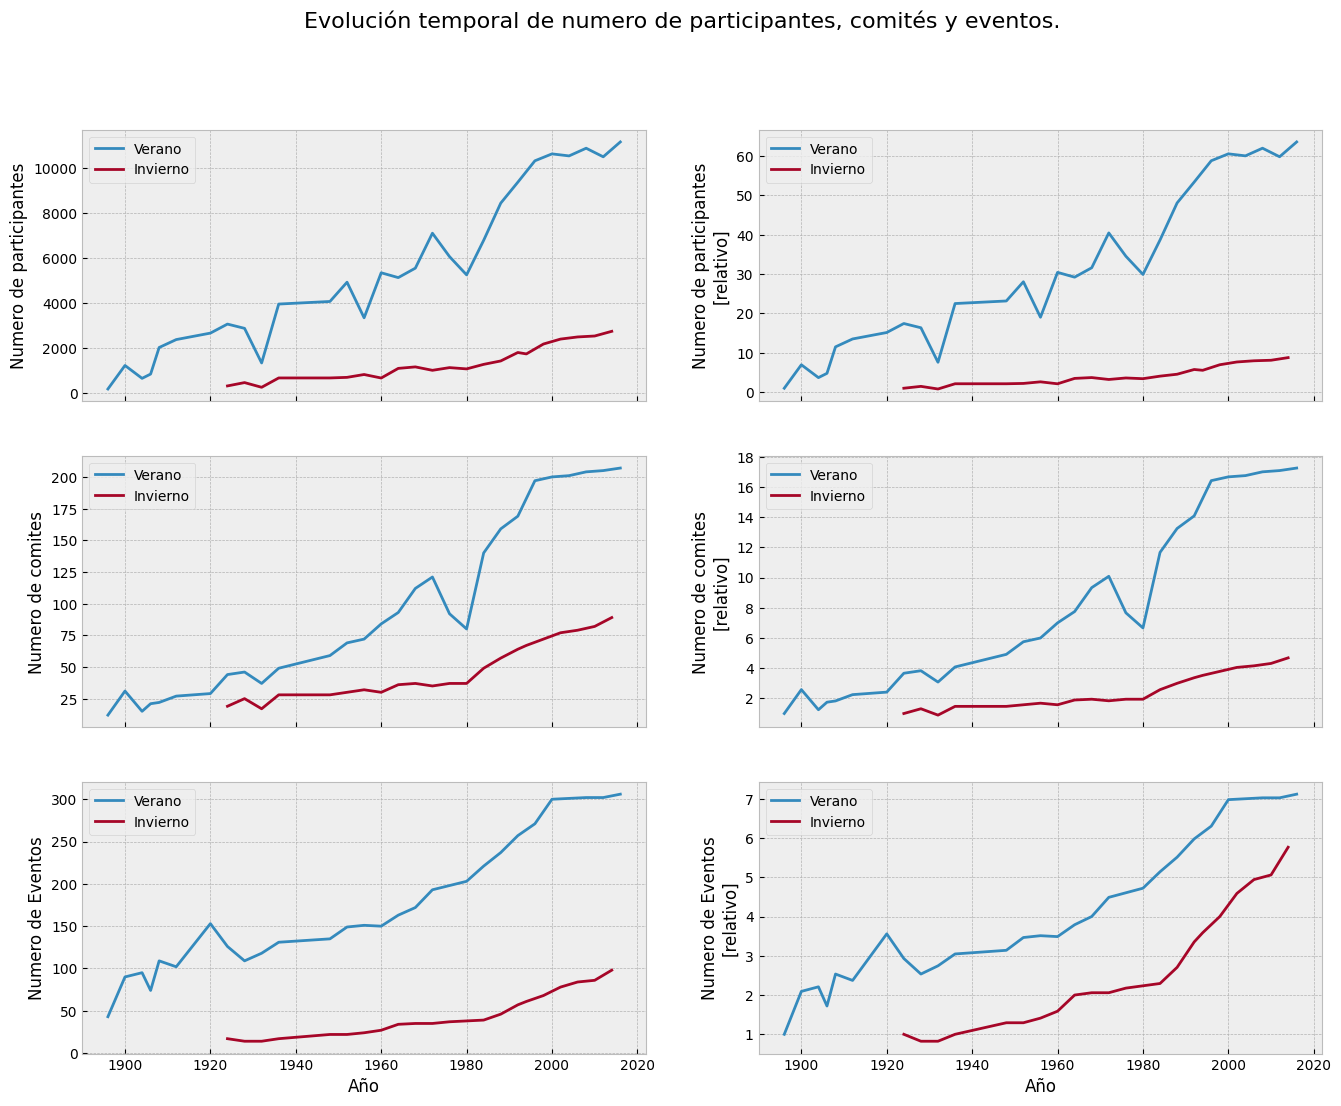

In [22]:
fig, ((ax1, ax2), (ax3, ax4), (ax5, ax6)) = plt.subplots(3, 2, figsize=(16, 12), sharex=True)
fig.suptitle("Evolución temporal de numero de participantes, comités y eventos.", fontsize=16)

# Conteo de los datos agrupados por año y temporada
counts = df.groupby(["Year", "Season"]).nunique()
counts_summer = counts.xs("Summer", level=1)
counts_winter = counts.xs("Winter", level=1)

# Valores de x (en años) para verano e invierno
x_summer = counts_summer.index
x_winter = counts_winter.index

# -------------------------------------------------------------------
# Gráfico de evolución temporal de cantidad de participantes
y1_summer = counts_summer["ID"]
y1_winter = counts_winter["ID"]

ax1.plot(x_summer, y1_summer, label="Verano")
ax1.plot(x_winter, y1_winter, label="Invierno")
ax1.set_ylabel("Numero de participantes")
ax1.legend()

# Gráfico de evolución temporal de cantidad de participantes (en valores relativos)
ax2.plot(x_summer, y1_summer/y1_summer.iloc[0], label="Verano")
ax2.plot(x_winter, y1_winter/y1_winter.iloc[0], label="Invierno")
ax2.set_ylabel("Numero de participantes\n[relativo]")
ax2.legend()

# -------------------------------------------------------------------
# Gráfico de evolución temporal de la cantidad de comités participantes
y2_summer = counts_summer["NOC"]
y2_winter = counts_winter["NOC"]

ax3.plot(x_summer, y2_summer, label="Verano")
ax3.plot(x_winter, y2_winter, label="Invierno")
ax3.set_ylabel("Numero de comites")
ax3.legend()

# Gráfico de evolución temporal de la cantidad de comités participantes (en valores relativos)
ax4.plot(x_summer, y2_summer/y2_summer.iloc[0], label="Verano")
ax4.plot(x_winter, y2_winter/y2_winter.iloc[0], label="Invierno")
ax4.set_ylabel("Numero de comites\n[relativo]")
ax4.legend()

# -------------------------------------------------------------------
# Gráfico de evolución temporal del numero de eventos/deportes presentes
y3_summer = counts_summer["Event"]
y3_winter = counts_winter["Event"]

ax5.plot(x_summer, y3_summer, label="Verano")
ax5.plot(x_winter, y3_winter, label="Invierno")
ax5.set_xlabel("Año")
ax5.set_ylabel("Numero de Eventos")
ax5.legend()

# Gráfico de evolución temporal del numero de eventos/deportes presentes (en valores relativos)
ax6.plot(x_summer, y3_summer/y3_summer.iloc[0], label="Verano")
ax6.plot(x_winter, y3_winter/y3_winter.iloc[0], label="Invierno")
ax6.set_xlabel("Año")
ax6.set_ylabel("Numero de Eventos\n[relativo]")
ax6.legend()

##  Medallero Olímpico <a class="anchor" id="medallero-olimpico"></a>

En esta sección se busca establecer cuales son los paises que han ganado la mayor cantidad de medallas.